# Logging


*Setting up logging can be hard, but in this notebook we will go through different tools and libraries that can help you set up logging in your application.*

### What is logging?

- Logging is a means of tracking "events" when your application runs. 

- An *event* can be anything of interest that happens during the execution of your program like 
  - an occurance of an error, 
  - a simple infomatational message, 
  - announcing that your program started, or you API call was successful etc.

- Events are logged with a descriptive message which optionally can have associated metadata about the state of your application.

- Application developers can assign log events a level of importance; the importance can also be called the **level or severity**.


### When to use logging?

| Task you want to perform                                                                 | The best tool for the task                                                                                         |
|------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------|
| Display console output for ordinary usage of a command line script or program            | `print()`                                                                                                          |
| Report events that occur during normal operation of a program (e.g. for status monitoring or fault investigation) | A logger’s `info()` (or `debug()` method for very detailed output for diagnostic purposes)                          |
| Issue a warning regarding a particular runtime event                                     | `warnings.warn()` in library code if the issue is avoidable and the client application should be modified to eliminate the warning<br>A logger’s `warning()` method, if there is nothing the client application can do about the situation, but the event should still be noted |
| Report an error regarding a particular runtime event                                     | Raise an exception                                                                                                 |
| Report suppression of an error without raising an exception (e.g. error handler in a long-running server process) | A logger’s `error()`, `exception()`, or `critical()` method as appropriate for the specific error and application domain |


### Logging Levels

The logger methods are named after the *level or severity* of the events they are used to track. The standard levels (in increasing order of severity) are: `DEBUG`, `INFO`, `WARNING`, `ERROR`, and `CRITICAL`. 

You can read more about them [*here*](https://docs.python.org/3/library/logging.html#logging-levels).


<p align="right"><i>Source: <a href="https://docs.python.org/3/howto/logging.html">Python Logging Docs</a></i></p>

In [1]:
# Install the logging libraries

%pip install -q loguru aws-lambda-powertools matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# TODO

- [x] How to toggle the verbosity of traceback in loguru?
- [x] Ideally show the both ways

- [ ] Log Perf. Analysis: Time analysis

## Python's `logging` module

In [1]:
# Setup logging in the simplest way possible

import os
import sys
import logging


# get log level from environment variable
LOG_LEVEL = os.environ.get("LOG_LEVEL", "INFO").upper()

# configure logger object with the desired log level and format
logging.basicConfig(
    format="{asctime} | {levelname} | {name}:{lineno}:{funcName} | {message}",
    style="{",  # uses {} as placeholders
    level=LOG_LEVEL,
    stream=sys.stdout,  # where to write the log messages, in this case stdout or console
)

# create logger object with the name of the current module/file to start logging
logger = logging.getLogger(__name__)

# logger = logging.getLogger("my_logger_instance")  # you can also use a custom name

# log some messages
logger.debug("This is a debug message")  # this will not be printed because the log level is set to INFO
logger.info("This is an info message")
logger.warning("This is a warning message")
logger.error("This is an error message")
logger.critical("This is a critical message")
# logger.exception("This is an exception message")

2024-08-13 14:04:01,858 | INFO | __main__:26:<module> | This is an info message
2024-08-13 14:04:01,859 | WARNING | __main__:27:<module> | This is a warning message
2024-08-13 14:04:01,860 | ERROR | __main__:28:<module> | This is an error message
2024-08-13 14:04:01,861 | CRITICAL | __main__:29:<module> | This is a critical message


^^^ Note that no `DEBUG` statement was emitted because the log level is set to `INFO`, which mutes all log statements of severity `DEBUG` or lower. In general, setting the log level supresses log events of lower severity.

---

The logging library takes a modular approach and offers several categories of components: *loggers, handlers, filters, and formatters*.

- [***Loggers***](https://docs.python.org/3/howto/logging.html#loggers) used in code to generate log events, e.g. `logger` and `logger.info(...)`.
- [***Handlers***](https://docs.python.org/3/howto/logging.html#handlers) send the log records (created by loggers) to the appropriate destination. E.g. a handler that writes log events to a file or `stdout`.
- [***Filters***](https://docs.python.org/3/library/logging.html#filter-objects) provide a finer-grained facility for determining which log records to output. E.g. remove log statements that have Personally Identifiable Information (PII) like email addresses.
- [***Formatters***](https://docs.python.org/3/library/logging.html#logrecord-attributes) specify the layout of log records in the final output. E.g. formatting log events as JSON.


Log event information is passed between *loggers, handlers, filters and formatters* in a LogRecord instance.Logging is performed by calling methods on instances of the Logger class. You can read more on it [*here*](https://docs.python.org/3/howto/logging.html#advanced-logging-tutorial) and [*here*](https://docs.python.org/3/library/logging.html).



<p align="right"><i>Source: <a href="https://docs.python.org/3/howto/logging.html#advanced-logging-tutorial">Advanced Python Logging Docs</a></i></p>


## Deep dive into the Python logging module
<iframe width="560" height="315" src="https://www.youtube.com/embed/9L77QExPmI0?si=d1Uk9un95D-PWicy" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [2]:
# Advanced logging setup with multiple handlers and a formatter
# Ref: https://docs.python.org/3/howto/logging-cookbook.html#logging-cookbook

import logging
import sys


# create a console handler and set its log level
ch = logging.StreamHandler(stream=sys.stderr)
ch.setLevel(logging.DEBUG)  # log all messages

# create another handler with a different log level that logs to a file
fh = logging.FileHandler("demo.log", mode="w", encoding="utf-8")
fh.setLevel(logging.WARNING)  # only log messages with WARNING level or higher

# create a formatter
formatter = logging.Formatter("{asctime} | {levelname} | {name}:{lineno}:{funcName} | {message}", style="{")
ch.setFormatter(formatter)  # apply the formatter to the console handler
fh.setFormatter(formatter)  # apply the formatter to the file handler


# create the logger
logger = logging.getLogger(__name__)

# add the handlers to the logger object
logger.addHandler(ch)
logger.addHandler(fh)

# log some messages
logger.debug("This is a debug message")
logger.info("This is an info message")
logger.warning("This is a warning message")
logger.error("This is an error message")
logger.critical("This is a critical message")


try:
    1 / 0
except Exception as err:
    logger.exception(
        "Exception details without traceback: %s", err, exc_info=False
    )  # this will log the exception message
    logger.exception(
        "Exception details with traceback: %s", err, exc_info=True
    )  # this will log the exception message and traceback

2024-08-14 13:15:23,047 | WARNING | __main__:32:<module> | This is a warning message
2024-08-14 13:15:23,048 | ERROR | __main__:33:<module> | This is an error message
2024-08-14 13:15:23,048 | CRITICAL | __main__:34:<module> | This is a critical message
2024-08-14 13:15:23,049 | ERROR | __main__:40:<module> | Exception details without traceback: division by zero
2024-08-14 13:15:23,049 | ERROR | __main__:43:<module> | Exception details with traceback: division by zero
Traceback (most recent call last):
  File "/var/folders/f3/pxd2mkvj6cvgxr_d9f2brs7w0000gn/T/ipykernel_43218/347257970.py", line 38, in <module>
    1 / 0
    ~~^~~
ZeroDivisionError: division by zero


## [`loguru`](https://loguru.readthedocs.io/en/stable/overview.html)

>The main concept of Loguru is that there is one and only one logger. No Handler, no Formatter, no Filter: one function to rule them all.

In [3]:
from loguru import logger

# log some messages
logger.debug("This is a debug message")
logger.info("This is an info message")
logger.warning("This is a warning message")
logger.error("This is an error message")
logger.critical("This is a critical message")
# logger.exception("This is an exception message")

2024-08-14 13:15:43.912 | DEBUG    | __main__:<module>:4 - This is a debug message
2024-08-14 13:15:43.912 | INFO     | __main__:<module>:5 - This is an info message
2024-08-14 13:15:43.913 | WARNING  | __main__:<module>:6 - This is a warning message
2024-08-14 13:15:43.913 | ERROR    | __main__:<module>:7 - This is an error message
2024-08-14 13:15:43.914 | CRITICAL | __main__:<module>:8 - This is a critical message


In [8]:
import os
import sys
import json
from loguru import logger

# loguru supports setting the log level with env vars out of the box
os.environ["LOGURU_LEVEL"] = "INFO"


def serialize_extra_keys(record):
    extra = record["extra"]
    if extra:
        record["extra"] = json.dumps(extra)
    return record


logging_config = {
    "handlers": [
        {
            "sink": sys.stdout,
            "format": "<green>{time:YYYY-MM-DD HH:mm:ss}</green> | <level>{level: <8}</level> | <cyan>{name}:{function}:{line}</cyan> | <level>{message}</level> | <level>{extra}</level>",
            "level": os.environ["LOGURU_LEVEL"],
            "filter": serialize_extra_keys,  # loguru filters are for post-processing/formatting log events
            "colorize": True,
        },
    ],
}

# Remove the default logger config and add custom configurations
logger.remove()
logger.configure(**logging_config)


# log some messages
logger.debug("This is a debug message")
logger.success("This is a success message")
logger.info("This is an info message")
logger.warning("This is a warning message")
logger.error("This is an error message")
logger.critical("This is a critical message")
logger.info(
    "Adding extra data to log messages",
    extra={"extra_key": "extra_value", "another_key": "another_value", "user_id": 12345},
)


# https://loguru.readthedocs.io/en/stable/overview.html#lazy-evaluation-of-expensive-functions
# https://github.com/Delgan/loguru/issues/30

try:
    1 / 0
except Exception as err:
    # logger.exception("An exception occurred: {}", e)    # log the exception details & traceback
    logger.opt(exception=False).error("Exception details without traceback: {}", err)

    # UNCOMMENT THE LINE BELOW TO SEE THE FULL TRACEBACK: loguru gives a ver long traceback
    logger.opt(exception=True).error("Exception details with traceback: {}", err)

2024-08-14 14:01:15 | SUCCESS  | __main__:<module>:36 | This is a success message | {}
2024-08-14 14:01:15 | INFO     | __main__:<module>:37 | This is an info message | {}
2024-08-14 14:01:15 | WARNING  | __main__:<module>:38 | This is a warning message | {}
2024-08-14 14:01:15 | ERROR    | __main__:<module>:39 | This is an error message | {}
2024-08-14 14:01:15 | CRITICAL | __main__:<module>:40 | This is a critical message | {}
2024-08-14 14:01:15 | INFO     | __main__:<module>:41 | Adding extra data to log messages | {"extra": {"extra_key": "extra_value", "another_key": "another_value", "user_id": 12345}}
2024-08-14 14:01:15 | ERROR    | __main__:<module>:54 | Exception details without traceback: division by zero | {}


TypeError: Logger.opt() got an unexpected keyword argument 'diagnose'

This is how logs get rendered in AWS CloudWatch:

![Logguru Logs](../assets/loguru_log.png)

## [`aws-lambda-powertools`](https://docs.powertools.aws.dev/lambda/python/latest/core/logger/)

>Logging utilities for AWS Lambda functions.

Specifically, if your application will only ever run in AWS Lambda, then the `aws-lambda-powertools` library may be the most convenient way to log.

The `aws_lambda_powertools` library provides `inject_lambda_context` decorator which injects AWS Lambda specific context information into the log record like `cold_start`, `function_request_id`, etc. along an option for logging incoming lambda event.

In [7]:
import os
import sys
from typing import Any
from aws_lambda_powertools import Logger
from aws_lambda_powertools.utilities.typing import LambdaContext
import os

# Powertools logger level can be configured using the environment variable POWERTOOLS_LOG_LEVEL
os.environ["POWERTOOLS_LOG_LEVEL"] = "WARNING"

# Set the "service key" that will be present across all log statements
# If you have a lot of different services, being able to easily filter logs by service name will be critical when you are troubleshooting a problem in production.
os.environ["POWERTOOLS_SERVICE_NAME"] = "demo-service"

logger = Logger(
    # stream=sys.stdout,
    # child=True, # If True, the logger will inherit the configuration from the parent logger into another logger instance
    # log_uncaught_exceptions=True,  # log uncaught exceptions
)


@logger.inject_lambda_context()  # clear_state=True will clear the logger state for each invocation
def handler(event: dict, context: LambdaContext) -> Any:
    try:
        logger.debug("This is a debug message")
        print()
        logger.info("This is an info message")
        print()
        logger.info("This is an info message with extra metadata", extra={"extra_key": "extra_value"})
        print()
        logger.info("This is an info message with another extra metadata", another_extra_key="another_extra_value")
        print()
        logger.warning("This is a warning message")
        print()

        # Add extra data to future log messages
        # logger.append_keys(extra_data={"user_id": 12345}); print()

        logger.error("This is an error message")
        print()
        logger.critical("This is a critical message")
        print()

        1 / 0  # raise an exception

        logger.info("Finished processing the event.")
        print()

        return {"statusCode": 200, "body": "Hello, World!"}
    except Exception as e:
        # THIS format is not supported by the logger
        # logger.exception("Exception without traceback: {}", e, exc_info=False); print()
        # logger.exception("Exception with traceback: {}", e, exc_info=True); print()

        logger.exception("Exception without traceback: %s", e, exc_info=False)
        print()
        logger.exception("Exception with traceback: %s", e, exc_info=True)
        print()
        return {"statusCode": 500, "body": "Internal Server Error"}


# Simulate the Lambda context (optional)
class Context:
    def __init__(self):
        self.function_name = "demo-function"
        self.memory_limit_in_mb = 128
        self.invoked_function_arn = "arn:aws:lambda:us-west-2:123456789012:function:test-function"
        self.aws_request_id = "fake-request-id"


if __name__ == "__main__":
    context = Context()

    # Call the handler function as Lambda would
    response = handler({}, context)
    print(response)





{"level":"WARNING","location":"handler:33","message":"This is a warning message","timestamp":"2024-08-14 13:26:32,831-0600","service":"demo-service","cold_start":true,"function_name":"demo-function","function_memory_size":128,"function_arn":"arn:aws:lambda:us-west-2:123456789012:function:test-function","function_request_id":"fake-request-id","taskName":"Task-2"}



{"level":"ERROR","location":"handler:39","message":"This is an error message","timestamp":"2024-08-14 13:26:32,831-0600","service":"demo-service","cold_start":true,"function_name":"demo-function","function_memory_size":128,"function_arn":"arn:aws:lambda:us-west-2:123456789012:function:test-function","function_request_id":"fake-request-id","taskName":"Task-2"}

{"level":"CRITICAL","location":"handler:41","message":"This is a critical message","timestamp":"2024-08-14 13:26:32,832-0600","service":"demo-service","cold_start":true,"function_name":"demo-function","function_memory_size":128,"function_arn":"arn:aws:lambda:us-west-2:123456789012:function:test-function","function_request_id":"fake-request-id","taskName":"Task-2"}

{"level":"ERROR","location":"handler:55","message":"Exception without traceback: division by zero","timestamp":"2024-08-14 13:26:32,832-0600","service":"demo-service","cold_start":true,"function_name":"demo-function","function_memory_size":128,"function_arn":"arn:aws:

This is how `aws-lambda-powertools` logs look like in AWS CloudWatch:

![AWS Lambda Powertools Logs](../assets/lambda_powertools_log.png)

## Logging Performance Analysis

Log file debug.log created successfully in 1.52 seconds.
Log file info.log created successfully in 1.18 seconds.
Log file warning.log created successfully in 0.90 seconds.
Log file error.log created successfully in 0.63 seconds.
Log file critical.log created successfully in 0.31 seconds.


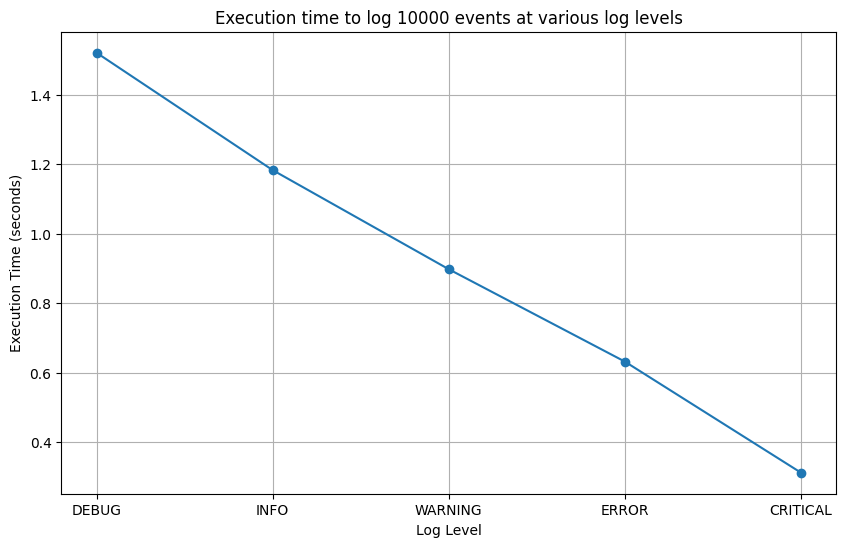

In [6]:
import os
import timeit
import matplotlib.pyplot as plt
from loguru import logger
import json


LOG_LEVELS = ["DEBUG", "INFO", "WARNING", "ERROR", "CRITICAL"]
NUM_EVENTS = 10_000

execution_times = []

def serialize_extra_keys(record):
    extra = record["extra"]
    if extra:
        record["extra"] = json.dumps(extra)
    return record

for log_level in LOG_LEVELS:
    log_file = f"{log_level.lower()}.log"

    # Define a function to execute the logging code
    def log_messages():
        log_file = f"{log_level.lower()}.log"
        logger.remove()
        logger.add(log_file, 
                   level=log_level, 
                   format="{time:YYYY-MM-DD HH:mm:ss} | {level} | {name}:{line} | {message} | {extra}", 
                   filter=serialize_extra_keys,)
        for _ in range(NUM_EVENTS):
            logger.debug("This is a debug message", extra={"level": "debug"})
            logger.info("This is an info message", extra={"level": "info"})
            logger.warning("This is a warning message", extra={"level": "warning"})
            logger.error("This is an error message", extra={"level": "error"})
            logger.critical("This is a critical message", extra={"level": "critical"})
        logger.remove()
        os.remove(log_file)

    # Measure the execution time using timeit
    execution_time = timeit.timeit(log_messages, number=1)
    execution_times.append(execution_time)

    print(f"Log file {log_file} created successfully in {execution_time:.2f} seconds.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(LOG_LEVELS, execution_times, marker="o")
plt.title(f"Execution time to log {NUM_EVENTS} events at various log levels")
plt.xlabel("Log Level")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()